<a href="https://colab.research.google.com/github/mdnehalsalik/FlightDelaysAnalysis_Statistics_Visualization_Python/blob/main/AnalysingAirlineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P2 - Statistics + Visualization

**Tues. Oct. 5, 2021, 11:59pm**

Analysing Airline data for flight delays and other anomalies, using visualization and analysis in Python.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time


# Flight Delays

Suppose the Houghton County Airport (CMX) is ready to renew its passenger airplane contract.  Airport officials and interested passengers would like to select an airline and connecting city that has reliable service.  *Currently, CMX is being served by United Airlines through Chicago-O'hare (ORD); it has been served by Delta in the past with connections to Minneapolis-St. Paul (MSP).* 

In order to make an informed decision, you have been tasked to look at flight delay statistics for three potential connector airports: 

* Chicago - O'hare (ORD) 
* Detroit (DTW) 
* Minneapolis - St. Paul (MSP) 

The data comes from the US Department of Transportation's [Bureau of Transportation Statistics (BTS)](https://www.bts.gov).  In particular, it comes from the Reporting Carrier On-Time Performance data tables:  
https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D

Information on the variables can be found in the Field Information:  
https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ


The data is structure with the following elements: 

* "YEAR"
* "MONTH"
* "DAY_OF_WEEK"
* "FL_DATE" - Flight Date (yyyymmdd)
* "OP_UNIQUE_CARRIER" - Unique Carrier Code
* "TAIL_NUM" - Tail number 
* "OP_CARRIER_FL_NUM" - Flight number 
* "ORIGIN" - Origin Airport code 
* "DEST" - Destination Airport code 
* "CRS_DEP_TIME" - Computer Reservation System Departure Time (local time: hhmm)
* "DEP_TIME" - Actual Departure Time (local time: hhmm)
* "CRS_ARR_TIME" - Computer Reservation System Arrival Time (local time: hhmm)
* "ARR_TIME" - Actual Arrival Time 
* "CANCELLED" - Cancelled Flight Indicator (1 = Yes)

You have access to 4 years of data July, 2017 - June, 2021. 

## Access the Data 

The data is available as a [Kaggle](http://www.kaggle.com) data set.  

Steps to download: 

1. Create a [Kaggle](https://www.kaggle.com/) account (if you don't have one already). 
2. After you log in, go to "My Account" 
3. Under API, select "Create API token", this will download a `kaggle.json` file that has two pieces of information:  `username` and  `key`.  Keep the `key` private!
4. Email/Post on Ed your username.  I am not making the data available publicly, but will share it with you all by your kaggle account.  


You will need to use your Kaggle credentials: `username` and API `key` to access the data using one of the methods below. 

##  Data Access 

Email or Post on Ed your Kaggle `username`.  The post on Ed can be a private response.  **DO NOT SHARE YOUR KEY!** just share your Kaggle username. 

#### Method 1: 

Copy and paste the key information (does not upload your key information to the Drive).

In [ ]:
import os 
from getpass import getpass

os.environ['KAGGLE_USERNAME'] = getpass("Enter Kaggle Username: ")
os.environ['KAGGLE_KEY'] = getpass("Enter Kaggle API Key: ")

Enter Kaggle Username: ··········
Enter Kaggle API Key: ··········


#### Method 2: 

Load `kaggle.json` to Colab directory (file is destroyed when sevice is disconnected).  This method relys on Google's security for safely storing and protecting your data.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# with open("kaggle.json") as f:
#     keys = json.load(f)

# os.environ['KAGGLE_USERNAME'] = keys["username"] # username from the json file
# os.environ['KAGGLE_KEY'] = keys["key"] # key from the json file

## Download the Data 


In [ ]:
!kaggle datasets download -d lebrown/un5550f21-p2 # api copied from kaggle

 94% 56.0M/59.6M [00:00<00:00, 131MB/s]
100% 59.6M/59.6M [00:00<00:00, 134MB/s]


In [ ]:
!unzip un5550f21-p2.zip

Archive:  un5550f21-p2.zip
  inflating: flights_ORD_MSP_DTW_01_2018.csv  
  inflating: flights_ORD_MSP_DTW_01_2019.csv  
  inflating: flights_ORD_MSP_DTW_01_2020.csv  
  inflating: flights_ORD_MSP_DTW_01_2021.csv  
  inflating: flights_ORD_MSP_DTW_02_2018.csv  
  inflating: flights_ORD_MSP_DTW_02_2019.csv  
  inflating: flights_ORD_MSP_DTW_02_2020.csv  
  inflating: flights_ORD_MSP_DTW_02_2021.csv  
  inflating: flights_ORD_MSP_DTW_03_2018.csv  
  inflating: flights_ORD_MSP_DTW_03_2019.csv  
  inflating: flights_ORD_MSP_DTW_03_2020.csv  
  inflating: flights_ORD_MSP_DTW_03_2021.csv  
  inflating: flights_ORD_MSP_DTW_04_2018.csv  
  inflating: flights_ORD_MSP_DTW_04_2019.csv  
  inflating: flights_ORD_MSP_DTW_04_2020.csv  
  inflating: flights_ORD_MSP_DTW_04_2021.csv  
  inflating: flights_ORD_MSP_DTW_05_2018.csv  
  inflating: flights_ORD_MSP_DTW_05_2019.csv  
  inflating: flights_ORD_MSP_DTW_05_2020.csv  
  inflating: flights_ORD_MSP_DTW_05_2021.csv  
  inflating: flights_ORD_MSP_DTW_

As you can see, there are 48 data files one for each month that should be loaded into a single data frame. 

Let's explore how we can do this. 

### Create DataFrame - version 1 

In this version we will use pandas `concat` or concatenate function. 

In [ ]:
import time
start = time.time()
df = pd.DataFrame() 

# Iterate over all files 
for file in os.listdir():
    if file.endswith(".csv"):
        df = pd.concat([df, pd.read_csv(file, header=None)], axis=0)

# reset the index 
df.reset_index(drop=True, inplace=True)
end = time.time()

print("Elapsed time:  ", end - start)

Elapsed time:   33.43014693260193


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2021,5,6,2021-05-01,OH,N571NN,5231,CLT,DTW,1630,1628.0,1832,1819.0,0.0,NaN
1,2021,5,7,2021-05-02,OH,N555NN,5231,CLT,DTW,1630,1624.0,1832,1815.0,0.0,NaN
2,2021,5,1,2021-05-03,OH,N557NN,5231,CLT,DTW,1630,1627.0,1832,1813.0,0.0,NaN
3,2021,5,2,2021-05-04,OH,N612NN,5231,CLT,DTW,1630,1915.0,1832,2055.0,0.0,NaN
4,2021,5,3,2021-05-05,OH,N587NN,5231,CLT,DTW,1630,1626.0,1832,1834.0,0.0,NaN


**What's the problem with this version?** 

The concatenate function is called each iteration of the loop and it is slow!



### Create DataFrame - version 2 

In this version we still use `concat`, but do it on a list of data frames. 

In [ ]:
import glob
start = time.time()
files = glob.glob('' + "*.csv")
dfs = (
    pd.read_csv(f, header=None) for f in files
)

df2 = pd.concat(dfs)

# reset the index 
df2.reset_index(drop=True, inplace=True)
end = time.time()

print("Elapsed time:  ", end - start)


Elapsed time:   6.703462839126587


In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2021,5,6,2021-05-01,OH,N571NN,5231,CLT,DTW,1630,1628.0,1832,1819.0,0.0,NaN
1,2021,5,7,2021-05-02,OH,N555NN,5231,CLT,DTW,1630,1624.0,1832,1815.0,0.0,NaN
2,2021,5,1,2021-05-03,OH,N557NN,5231,CLT,DTW,1630,1627.0,1832,1813.0,0.0,NaN
3,2021,5,2,2021-05-04,OH,N612NN,5231,CLT,DTW,1630,1915.0,1832,2055.0,0.0,NaN
4,2021,5,3,2021-05-05,OH,N587NN,5231,CLT,DTW,1630,1626.0,1832,1834.0,0.0,NaN


In [ ]:
flights = df2 
del df, df2

In [ ]:
flights.dtypes

0       int64
1       int64
2       int64
3      object
4      object
5      object
6       int64
7      object
8      object
9       int64
10    float64
11      int64
12    float64
13    float64
14    float64
dtype: object

## Set up Data 

The DataFrame currently has no column names.  

Set the column names to be: `year`, `month`, `dayOfWeek`, `date`, `carrier`, `tailNum`, `flNum`, `origin`, `dest`, `crsDepTime`, `actDepTime`, `crsArrTime`, `actArrTime`, `cancelled` 

Also, remove the last column that is all `NaN` values. 

In [ ]:
# Set DataFrame columns to names above
columns_ = ['year', 'month', 'dayOfWeek', 'date', 'carrier', 'tailNum', 'flNum', 'origin', 'dest', 'crsDepTime', 'actDepTime', 'crsArrTime', 'actArrTime', 'cancelled', 'NAN_']
flights.columns = columns_
flights.pop("NAN_")

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
4272383   NaN
4272384   NaN
4272385   NaN
4272386   NaN
4272387   NaN
Name: NAN_, Length: 4272388, dtype: float64

In [ ]:
flights.head()

,year,month,dayOfWeek,date,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,crsArrTime,actArrTime,cancelled
0,2021,5,6,2021-05-01,OH,N571NN,5231,CLT,DTW,1630,1628.0,1832,1819.0,0.0
1,2021,5,7,2021-05-02,OH,N555NN,5231,CLT,DTW,1630,1624.0,1832,1815.0,0.0
2,2021,5,1,2021-05-03,OH,N557NN,5231,CLT,DTW,1630,1627.0,1832,1813.0,0.0
3,2021,5,2,2021-05-04,OH,N612NN,5231,CLT,DTW,1630,1915.0,1832,2055.0,0.0
4,2021,5,3,2021-05-05,OH,N587NN,5231,CLT,DTW,1630,1626.0,1832,1834.0,0.0


Now, explore some basic information about the data. 

In [ ]:
# Fill in following print statements to learn more about the data set 

print("Flight data:   %8d rows,  %d columns" % (len(flights.index), len(flights.columns)))

Flight data:    4272388 rows,  14 columns


Remove the cancelled flights. 


In [ ]:
flights = flights[flights['cancelled'] ==0.0]    # Removed the cancelled flights by setting cancelled = 0.0 and filtering the dataframe
print("Flight data:   %8d rows" % len(flights.index))

Flight data:    4174867 rows


Report the number of flights departing and arriving from each of the three airports under study: `DTW`, `MSP`, and `ORD`

In [ ]:
### YOUR CODE HERE

print("DTW flights:   %7d arrivals,  %7d departures" % (len(flights[flights['dest'] == 'DTW'].index), len(flights[flights['origin'] == 'DTW'].index)))

### YOUR CODE HERE

print("MSP flights:   %7d arrivals,  %7d departures" % (len(flights[flights['dest'] == 'MSP'].index), len(flights[flights['origin'] == 'MSP'].index)))

### YOUR CODE HERE

print("ORD flights:   %7d arrivals,  %7d departures" % (len(flights[flights['dest'] == 'ORD'].index), len(flights[flights['origin'] == 'ORD'].index)))

DTW flights:    544223 arrivals,   544280 departures
MSP flights:    537335 arrivals,   537401 departures
ORD flights:   1061977 arrivals,  1063292 departures


*Note*: The number of flights arriving and departing from the three airports exceeds the total number of flights, because flights between the 3 are counted twice. 

## Extract Time Information

Both the departure and arrival times were read in as integers or floating-point numbers in local time format: `hhmm``. Write two functions, `extract_hour` and `extract_mins` that converts the local time to hours and minutes, respectively. Hint: You may want to use modular arithmetic and integer division.

Remove the `raise NotImplementedError()` line below and replace with your implementation of the requested function. 


In [ ]:
def extract_hour(time):
    """
    Extract hour information from the time given in hhmm format.

    Input:
        time (float64 or int64): array of time given in hhmm format.  
          Takes on values in 0.0-2359.0 in float64 representation or 
          values in 0000-2359 in int64 representation
 
    Returns:
        array (float64 or int64): array of same dimension as input of hours  
          values should be 0-23
    
    Example: 1303 should return 13
    >>> extract_hour(1303.0)
    13
    """
    ### YOUR CODE HERE
    a=[]
    for i in time:
      new_time = i//100
      a.append(new_time)
      return (a)
extract_hour([flights["crsDepTime"]])
    

[0          16
 1          16
 2          16
 3          16
 4          16
            ..
 4272383    18
 4272384    15
 4272385     6
 4272386     8
 4272387    17
 Name: crsDepTime, Length: 4174867, dtype: int64]

In [ ]:
def extract_min(time):
    """
    Extract minute information from the time given in hhmm time.

    Input:
        time (float64 or int64): array of time given in hhmm format.  
          Takes on values in 0.0-2359.0 in float64 representation or 
          values in 0000-2359 in int64 representation
    
    Returns:
        array (float64 or int64): array of samme dimension as input of minutes.  
          values should be 0-59
    
     Example: 1303 should return 3
    >>> extract_mins(1303.0)
    3
    """
    ### YOUR CODE HERE
    b=[]
    for i in time:
      new_time = i%100
      b.append(new_time)
      return (b)
extract_min([flights["actDepTime"]])
   

[0          28.0
 1          24.0
 2          27.0
 3          15.0
 4          26.0
            ... 
 4272383    24.0
 4272384     2.0
 4272385    37.0
 4272386    51.0
 4272387    56.0
 Name: actDepTime, Length: 4174867, dtype: float64]

In [ ]:
flights.head(5)

,year,month,dayOfWeek,date,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,crsArrTime,actArrTime,cancelled
0,2021,5,6,2021-05-01,OH,N571NN,5231,CLT,DTW,1630,1628.0,1832,1819.0,0.0
1,2021,5,7,2021-05-02,OH,N555NN,5231,CLT,DTW,1630,1624.0,1832,1815.0,0.0
2,2021,5,1,2021-05-03,OH,N557NN,5231,CLT,DTW,1630,1627.0,1832,1813.0,0.0
3,2021,5,2,2021-05-04,OH,N612NN,5231,CLT,DTW,1630,1915.0,1832,2055.0,0.0
4,2021,5,3,2021-05-05,OH,N587NN,5231,CLT,DTW,1630,1626.0,1832,1834.0,0.0


## Calculate Delayed Flights

Using your two functions above, add two new columns to the `flights` DataFrame that will contain the departure delay `depDelay` and arrival delay `arrDelay`.

*Be careful for handling flights that were delayed after midnight.  Assume no flight leaves more than 1.5 hours early*

To help answer this question, implement the following helper functions: `convert_to_minofday` and `calc_time_diff`.

In [ ]:
def convert_to_minofday(time):
    """
    Converts time in hhmm format to minute of day.
    
    Input:
       time (float64 or int64): array of time given in hhmm format.  
          Takes on values in 0.0-2359.0 in float64 representation or 
          values in 0000-2359 in int64 representation
    
    Returns:
        array (float64 or int64): array of same dimension as input with total mins
    
     
    Example: 1303 is converted to 783
    >>> convert_to_minofday(1303.0)
    783.0
    """
    ### YOUR CODE HERE
    c=[]
    for i in time:
      c_min = (i//100)*60 + (i%100)
      c.append(c_min)
      return (c)

def calc_time_diff(x, y):
  
    a = convert_to_minofday(y)
    b = convert_to_minofday(x)
    abc = []
    for j,i in zip(a[0],b[0]):
      if (np.logical_and(j<=60,j-i <= -90)):
        alpha = j-i+24*60
        abc.append(alpha)
      elif np.logical_and(j<=60,j-i > -90):
        alpha = j-i
        abc.append(alpha)
      elif np.logical_and(i<=60,(i-j+24*60) > 90):
        alpha = j-i
        abc.append(alpha)
      elif np.logical_and(i<=60,(i-j+24*60) < 90):
        alpha = j-i-24*60
        abc.append(alpha)
      else:
        alpha = j-i
        abc.append(alpha)
    return (abc)



In [ ]:
# Add the two columns to the flights DataFrame
### YOUR CODE HERE
depDelay = calc_time_diff([flights["crsDepTime"]], [flights["actDepTime"]])
flights['depDelay'] = depDelay
arrDelay = calc_time_diff([flights["crsArrTime"]], [flights["actArrTime"]])
flights['arrDelay'] = arrDelay
flights.head(200)


,year,month,dayOfWeek,date,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,crsArrTime,actArrTime,cancelled,depDelay,arrDelay
0,2021,5,6,2021-05-01,OH,N571NN,5231,CLT,DTW,1630,1628.0,1832,1819.0,0.0,-2.0,-13.0
1,2021,5,7,2021-05-02,OH,N555NN,5231,CLT,DTW,1630,1624.0,1832,1815.0,0.0,-6.0,-17.0
2,2021,5,1,2021-05-03,OH,N557NN,5231,CLT,DTW,1630,1627.0,1832,1813.0,0.0,-3.0,-19.0
3,2021,5,2,2021-05-04,OH,N612NN,5231,CLT,DTW,1630,1915.0,1832,2055.0,0.0,165.0,143.0
4,2021,5,3,2021-05-05,OH,N587NN,5231,CLT,DTW,1630,1626.0,1832,1834.0,0.0,-4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,5,2,2021-05-25,OO,N758EV,2965,ORD,ALB,1316,1320.0,1618,1613.0,0.0,4.0,-5.0
196,2021,5,2,2021-05-25,OO,N611SK,2970,ORD,GRB,2046,2038.0,2151,2135.0,0.0,-8.0,-16.0
197,2021,5,2,2021-05-25,OO,N753EV,2974,DSM,ORD,1053,1047.0,1224,1210.0,0.0,-6.0,-14.0
198,2021,5,2,2021-05-25,OO,N753EV,2974,ORD,DSM,825,816.0,1009,934.0,0.0,-9.0,-35.0


## Filter Delayed Flights 

Use filter the `flights` data for flights that departed 75 or more minutes later than scheduled.  Report the number and as percentage of all departing flights for each airport.

In [ ]:
"""
Using your functions above, filter the flights data for flights 
that departed 75 or more minutes later than scheduled. 

Report the number of departures delayed at each city and the percentage of 
 departures from each airport. 
"""


# FOR THE DTW 

origin_dtw = flights[flights['origin'] == 'DTW'] # Selecting the origin only to DTW
origin_dtw_len = len(origin_dtw.index)           # Calculating the no of flights originating from DTW
origin_dtw_delay_m75 = origin_dtw[origin_dtw['depDelay'] >= 75] # selecting the DTW flights df with departure delay greater than equal to 75
origin_dtw_delay_m75_len = len(origin_dtw_delay_m75.index)      # Calculating the no of delayed flights originating from DTW
perdeldep_dtw = (origin_dtw_delay_m75_len/origin_dtw_len)*100   # Calculating the percentage of dtw flights with dep delay >= 75 minutes, as a total no of flight originating from DTW

# FOR THE MSP 

origin_msp = flights[flights['origin'] == 'MSP'] # Selecting the origin only to MSP
origin_msp_len = len(origin_msp.index)           # Calculating the no of flights originating from MSP
origin_msp_delay_m75 = origin_msp[origin_msp['depDelay'] >= 75] # selecting the MSP flights df with departure delay greater than equal to 75
origin_msp_delay_m75_len = len(origin_msp_delay_m75.index)      # Calculating the no of delayed flights originating from MSP
perdeldep_msp = (origin_msp_delay_m75_len/origin_msp_len)*100   # Calculating the percentage of MSP flights with dep delay >= 75 minutes, as a total no of flight originating from MSP

# FOR THE ORD 

origin_ord = flights[flights['origin'] == 'ORD'] # Selecting the origin only to ORD
origin_ord_len = len(origin_ord.index)           # Calculating the no of flights originating from ORD
origin_ord_delay_m75 = origin_ord[origin_ord['depDelay'] >= 75] # selecting the ORD flights df with departure delay greater than equal to 75
origin_ord_delay_m75_len = len(origin_ord_delay_m75.index)      # Calculating the no of delayed flights originating from ORD
perdeldep_ord = (origin_ord_delay_m75_len/origin_ord_len)*100   # Calculating the percentage of ORD flights with dep delay >= 75 minutes, as a total no of flight originating from ORD

print("DTW delayed flights:  %7d, %3.3f%%" % (origin_dtw_delay_m75_len, perdeldep_dtw ))
print("MSP delayed flights:  %7d, %3.3f%%" % (origin_msp_delay_m75_len, perdeldep_msp))
print("ORD delayed flights:  %7d, %3.3f%%" % (origin_ord_delay_m75_len, perdeldep_ord))


DTW delayed flights:    20693, 3.802%
MSP delayed flights:    16682, 3.104%
ORD delayed flights:    56233, 5.289%


## Distribution and Statistics on Flight Delays

Plot the distribution of delays for both arriving and departing flights for each airport.  The histograms should be placed side-by-side *hint: consider the `subplot` function*. Make sure to label and make the plots look nice. 

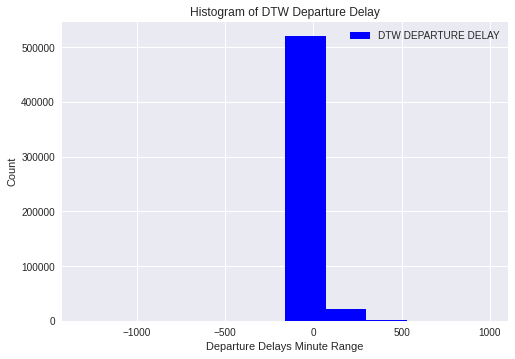

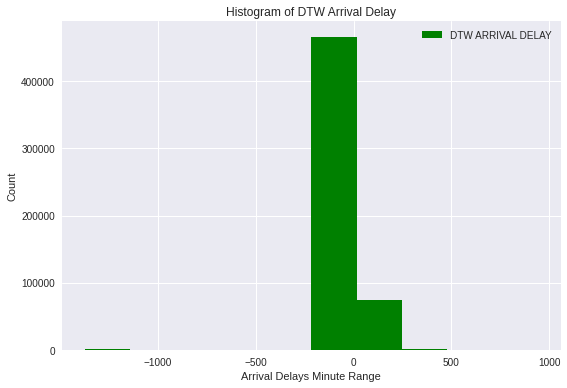

In [ ]:
### YOUR CODE HERE - DTW
# Histogram in Matplotlib

origin_dtw = flights[flights['origin'] == 'DTW'] # Selecting the origin only to DTW
origin_dtw_delay_m75 = origin_dtw[origin_dtw['depDelay'] >= 75] # selecting the DTW flights df with departure delay greater than equal to 75
plt.style.use('seaborn')

#dtw_dep_delay = origin_dtw_delay_m75['depDelay']
dtw_dep_delay = origin_dtw['depDelay']
#dtw_arr_delay = origin_dtw[origin_dtw['arrDelay'] >= 75]['arrDelay']
dtw_arr_delay = origin_dtw['arrDelay']


fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.hist(dtw_dep_delay, color='blue', label='DTW DEPARTURE DELAY')
ax2.hist(dtw_arr_delay,color='green', label='DTW ARRIVAL DELAY')

ax1.legend()
ax1.set_title('Histogram of DTW Departure Delay')
ax1.set_xlabel('Departure Delays Minute Range')
ax1.set_ylabel('Count')

ax2.legend()
ax2.set_title('Histogram of DTW Arrival Delay')
ax2.set_xlabel('Arrival Delays Minute Range')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()



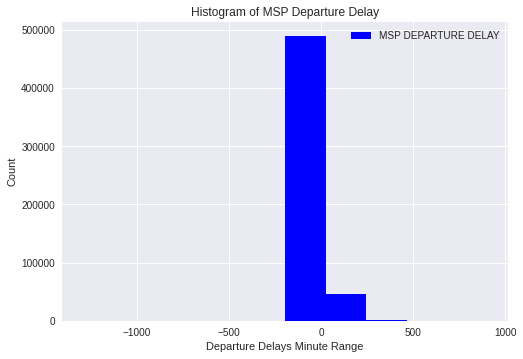

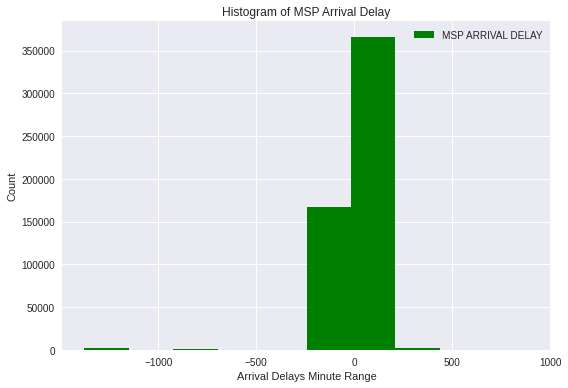

In [ ]:
### YOUR CODE HERE - MSP
# Histogram in Matplotlib

origin_msp = flights[flights['origin'] == 'MSP'] # Selecting the origin only to MSP
origin_msp_delay_m75 = origin_msp[origin_msp['depDelay'] >= 75] # selecting the MSP flights df with departure delay greater than equal to 75
plt.style.use('seaborn')

#msp_dep_delay = origin_msp_delay_m75['depDelay']
msp_dep_delay = origin_msp['depDelay']
#msp_arr_delay = origin_msp[origin_msp['arrDelay'] >= 75]['arrDelay']
msp_arr_delay = origin_msp['arrDelay']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.hist(msp_dep_delay, color='blue', label='MSP DEPARTURE DELAY')
ax2.hist(msp_arr_delay,color='green', label='MSP ARRIVAL DELAY')

ax1.legend()
ax1.set_title('Histogram of MSP Departure Delay')
ax1.set_xlabel('Departure Delays Minute Range')
ax1.set_ylabel('Count')

ax2.legend()
ax2.set_title('Histogram of MSP Arrival Delay')
ax2.set_xlabel('Arrival Delays Minute Range')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()




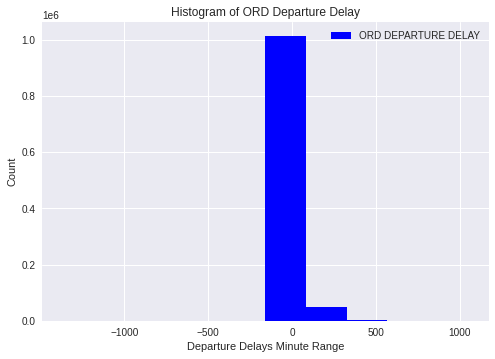

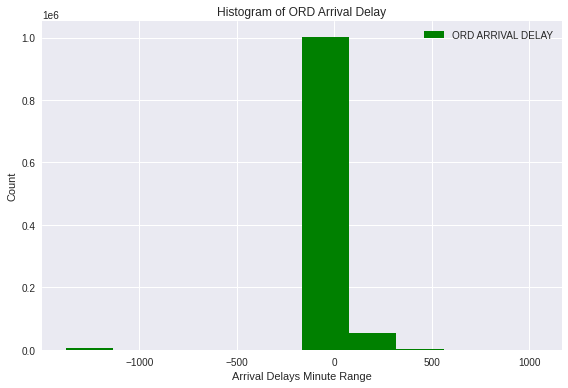

In [ ]:
### YOUR CODE HERE - ORD
# Histogram in Matplotlib

origin_ord = flights[flights['origin'] == 'ORD'] # Selecting the origin only to ORD
origin_ord_delay_m75 = origin_ord[origin_ord['depDelay'] >= 75] # selecting the ORD flights df with departure delay greater than equal to 75
plt.style.use('seaborn')

#ord_dep_delay = origin_ord_delay_m75['depDelay']
ord_dep_delay = origin_ord['depDelay']
#ord_arr_delay = origin_ord[origin_ord['arrDelay'] >= 75]['arrDelay']
ord_arr_delay = origin_ord['arrDelay']
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.hist(ord_dep_delay, color='blue', label='ORD DEPARTURE DELAY')
ax2.hist(ord_arr_delay,color='green', label='ORD ARRIVAL DELAY')

ax1.legend()
ax1.set_title('Histogram of ORD Departure Delay')
ax1.set_xlabel('Departure Delays Minute Range')
ax1.set_ylabel('Count')

ax2.legend()
ax2.set_title('Histogram of ORD Arrival Delay')
ax2.set_xlabel('Arrival Delays Minute Range')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


Present the mean and standard deviation for departure and arrival delays for each airport.

In [ ]:
### YOUR CODE HERE

# FOR DTW

origin_dtw_delay_m75 = origin_dtw[origin_dtw['depDelay'] >= 75] 
meanDepDTW = origin_dtw['depDelay'].mean()
stdDepDTW = origin_dtw['depDelay'].std()
print("Depature Delay for flights leaving DTW")
print(" Mean:    ", meanDepDTW)
print(" Std Dev: ", stdDepDTW)

dest_dtw = flights[flights['dest'] == 'DTW'] 
dest_dtw_delay_m75 = dest_dtw[dest_dtw['arrDelay'] >= 75]
meanArrDTW = dest_dtw['arrDelay'].mean()
stdArrDTW = dest_dtw['arrDelay'].std()

print("Arrival Delay for flights arriving in DTW")
print(" Mean:    ", meanArrDTW)
print(" Std Dev: ", stdArrDTW)

# FOR MSP
origin_msp_delay_m75 = origin_msp[origin_msp['depDelay'] >= 75] 
meanDepMSP = origin_msp['depDelay'].mean()
stdDepMSP = origin_msp['depDelay'].std()
print("Depature Delay for flights leaving MSP")
print(" Mean:    ", meanDepMSP)
print(" Std Dev: ", stdDepMSP)

dest_msp = flights[flights['dest'] == 'MSP'] 
dest_msp_delay_m75 = dest_msp[dest_msp['arrDelay'] >= 75]
meanArrMSP = dest_msp['arrDelay'].mean()
stdArrMSP = dest_msp['arrDelay'].std()

print("Arrival Delay for flights arriving in MSP")
print(" Mean:    ", meanArrMSP)
print(" Std Dev: ", stdArrMSP)

# FOR ORD

origin_ord_delay_m75 = origin_ord[origin_ord['depDelay'] >= 75] 
meanDepORD = origin_ord['depDelay'].mean()
stdDepORD = origin_ord['depDelay'].std()
print("Depature Delay for flights leaving ORD")
print(" Mean:    ", meanDepORD)
print(" Std Dev: ", stdDepORD)

dest_ord = flights[flights['dest'] == 'ORD'] 
dest_ord_delay_m75 = dest_ord[dest_ord['arrDelay'] >= 75]
meanArrORD = dest_ord['arrDelay'].mean()
stdArrORD = dest_ord['arrDelay'].std()

print("Arrival Delay for flights arriving in ORD")
print(" Mean:    ", meanArrORD)
print(" Std Dev: ", stdArrORD)


Depature Delay for flights leaving DTW
 Mean:     4.879279047549056
 Std Dev:  48.29504441053702
Arrival Delay for flights arriving in DTW
 Mean:     -4.690599094769842
 Std Dev:  78.90514642890619
Depature Delay for flights leaving MSP
 Mean:     3.6394703396532573
 Std Dev:  46.220539168692554
Arrival Delay for flights arriving in MSP
 Mean:     -4.521584963396861
 Std Dev:  70.06905711894548
Depature Delay for flights leaving ORD
 Mean:     8.303696444626688
 Std Dev:  51.37644486164549
Arrival Delay for flights arriving in ORD
 Mean:     0.8566579836095525
 Std Dev:  77.34632413555191


## Top Ten Planes 

Find the tail number of the top ten planes, with the worst departure delays (average delays).  You may find `drop_duplicates`, `agg`, and `sort_values` helpful.
 
Report out the tail number, number of flights, and the mean delay for these top planes. 

In [ ]:
### YOUR CODE HERE
flights.head(5)
df5 = flights[["tailNum", "depDelay"]].copy()    ## created a new data frame, with columns tailNum and depDelay
df5 = df5.sort_values('depDelay', ascending=False)
df6 = df5.iloc[0:10]
print(df6)
# printing  the list of top 10 tailNum with worst dep delaay as a list below
list_of_top10tailnum = df6['tailNum'].to_list()
print('List of top 10 tailNum with worst departure delays: ')
print(list_of_top10tailnum)

# Filtering the dataframe contining tailNum only in the above list
df8 = df5[df5.tailNum.isin(list_of_top10tailnum)]

# Now calculating the number of flights, and the mean delay for the top 10 tailNum with worst delays
print(df8.groupby('tailNum').mean()) # Mean delay of each top10 tailNum flights
print("No of top10 tailNum flights: %d " %(len(df8.index))) # No of top 10 TailNum flights

        tailNum  depDelay
4123574  N991AT    1200.0
1150043  N942AT    1175.0
1575568  N420UA    1145.0
2050540  N745SK    1125.0
769911   N818MD    1103.0
1705398  N904DA    1097.0
1297035  N354NB    1094.0
2071226  N732SK    1094.0
1688622  N885AS    1089.0
2928458  N807NN    1069.0
List of top 10 tailNum with worst departure delays: 
['N991AT', 'N942AT', 'N420UA', 'N745SK', 'N818MD', 'N904DA', 'N354NB', 'N732SK', 'N885AS', 'N807NN']
          depDelay
tailNum           
N354NB    3.574215
N420UA   15.627572
N732SK   12.915018
N745SK   10.615060
N807NN    9.052711
N818MD    5.366034
N885AS    6.023025
N904DA    5.990815
N942AT    4.622161
N991AT    4.990931
No of top10 tailNum flights: 18816 


## Pattern of Delays 

Let's examine if their are pattern of delays.  We can focus just on data from ORD, in particular departure delays. 



### Departure Delays by Day of Week 

Let's examine if the departure delays differ by which day a flight is scheduled to leave. 

Create a bar chart showing the mean departure delay for each day of the week. 


     dayOfWeek  depDelay  dayOfWeek_
191          2      -3.0           2
193          2       4.0           2
195          2       4.0           2
196          2      -8.0           2
198          2      -9.0           2
            dayOfWeek   depDelay
dayOfWeek_                      
1                   1  10.389848
2                   2   7.789493
3                   3   7.343034
4                   4   8.769438
5                   5   8.037279
6                   6   7.026567
7                   7   8.507861


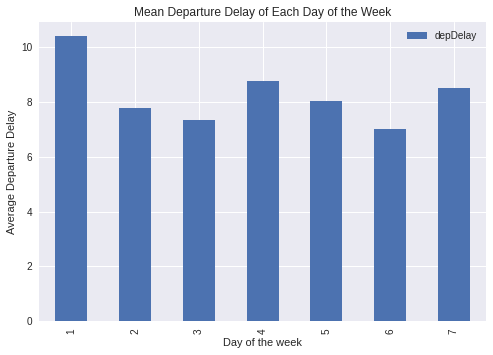

In [ ]:
### YOUR CODE HERE

origin_ord = flights[flights['origin'] == 'ORD'] # Selecting the origin only to ORD
df1 = origin_ord[["dayOfWeek", "depDelay"]].copy()    ## created a new data frame, with columns month and DepDelay
# Add a new column dayOfWeek_
df1["dayOfWeek_"] = df1['dayOfWeek']
print(df1.head())

# Group the data by years and calculates the mean of the depDelay
df2= df1.groupby(["dayOfWeek_"]).mean()
print(df2.head(10))
df2.plot.bar(x='dayOfWeek', y='depDelay', xlabel = 'Day of the week', ylabel = "Average Departure Delay", title = "Mean Departure Delay of Each Day of the Week" );


###Dept. Delays by Month

Next, let's examine if the depature delays differ by month of the year. 

Create a bar chart showing the mean departure delay for each month of the year. 

     month  depDelay  month_
191      5      -3.0       5
193      5       4.0       5
195      5       4.0       5
196      5      -8.0       5
198      5      -9.0       5
        month   depDelay
month_                  
1           1   9.822402
2           2  10.517561
3           3   4.145801
4           4   4.585913
5           5   8.425158
6           6  14.663995
7           7  12.763277
8           8  10.074806
9           9   6.013729
10         10   4.944176


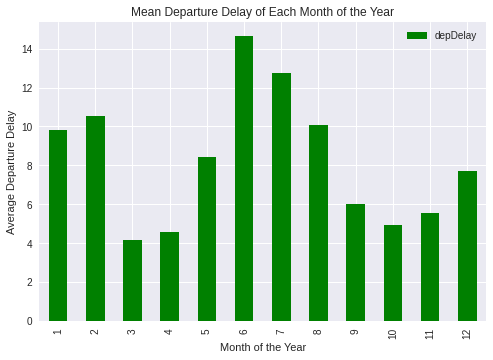

In [ ]:
### YOUR CODE HERE
### YOUR CODE HERE

origin_ord = flights[flights['origin'] == 'ORD'] # Selecting the origin only to ORD
df1 = origin_ord[["month", "depDelay"]].copy()    ## created a new data frame, with columns month and depDelay
# Add a new column month_
df1["month_"] = df1['month']
print(df1.head())

# Group the data by years and calculates the mean of the depDelay
df2= df1.groupby(["month_"]).mean()
print(df2.head(10))
df2.plot.bar(x='month', y='depDelay', xlabel = 'Month of the Year', ylabel = "Average Departure Delay", title = "Mean Departure Delay of Each Month of the Year", color = 'green' );



### Change in Dept. Delays over Time 

Finally, let's examine how the depature delays have changed over time, e.g., has covid impacted depature delays? 

Create a line graph plotting the mean depature delay for data's timespan. 

         date  depDelay
0  2021-05-01      -2.0
1  2021-05-02      -6.0
2  2021-05-03      -3.0
3  2021-05-04     165.0
4  2021-05-05      -4.0


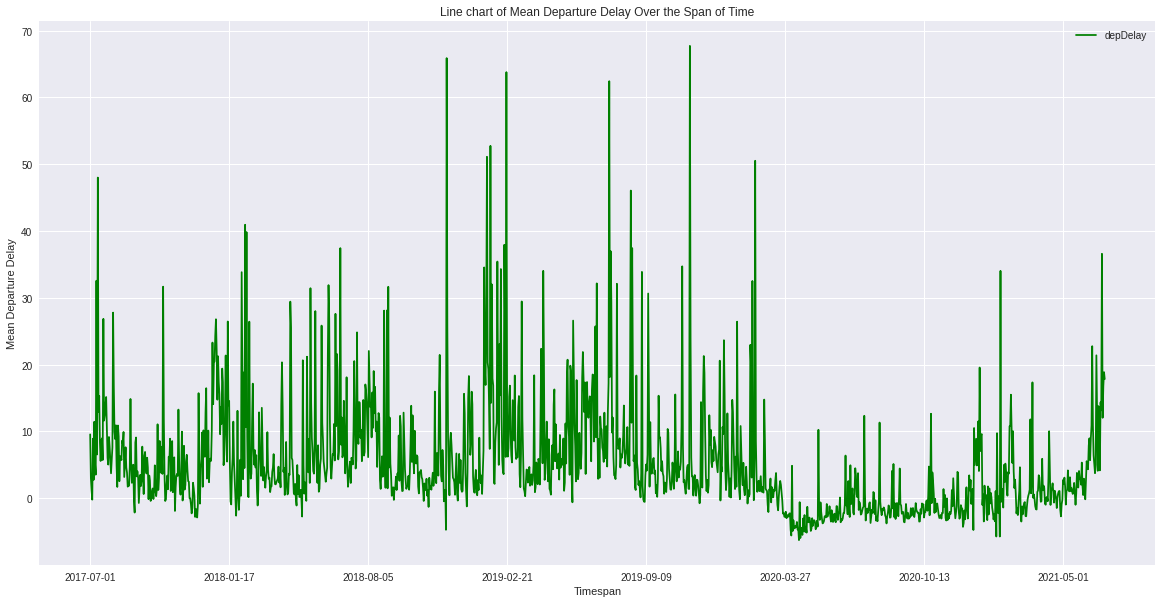

In [ ]:
### YOUR CODE HERE
### YOUR CODE HERE
### YOUR CODE HERE


df1 = flights[["date", "depDelay"]].copy()    ## created a new data frame, with columns month and depDelay
print(df1.head())
df1 = df1.sort_values('date', ascending=True)
# Group the data by years and calculates the mean of the depDelay
df1= df1.groupby(["date"]).mean()
df1.plot.line( y = 'depDelay', figsize=(20, 10), xlabel =  'Timespan', ylabel = 'Mean Departure Delay', title = 'Line chart of Mean Departure Delay Over the Span of Time', color = 'green');


## Examine how the impact of number of flights in a month with the mean depature delay.  Suggest using a scatterplot to examine this relationship. 

   month  depDelay  month_
0      5      -2.0       5
1      5      -6.0       5
2      5      -3.0       5
3      5     165.0       5
4      5      -4.0       5
        month   depDelay
month_                  
1           1   7.442837
2           2   9.228455
3           3   3.336075
4           4   4.296943
5           5   5.959086
6           6  10.453966
7           7   8.925773
8           8   7.533588
9           9   4.097802
10         10   3.807911
No of flights in month 1: 340035 
No of flights in month 2: 315472 
No of flights in month 3: 367653 
No of flights in month 4: 304786 
No of flights in month 5: 320261 
No of flights in month 6: 339682 
No of flights in month 7: 378691 
No of flights in month 8: 393320 
No of flights in month 9: 356689 
No of flights in month 10: 372661 
No of flights in month 11: 342437 
No of flights in month 12: 343180 
        month   depDelay  noOfFlight
month_                              
1           1   7.442837      340035
2           2   

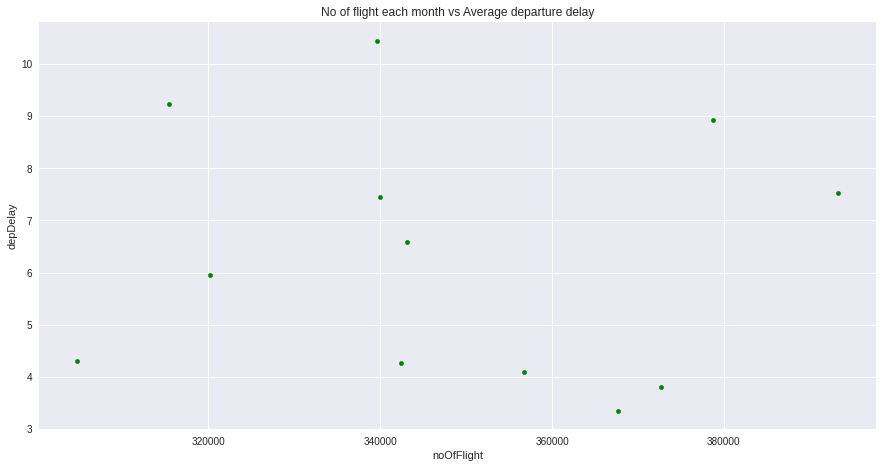

In [ ]:
### YOUR CODE HERE

df10 = flights[["month", "depDelay"]].copy()    ## created a new data frame, with columns month and depDelay
# Add a new column month_
df10["month_"] = df10['month']
print(df10.head())
# Group the data by years and calculates the mean of the depDelay
df11= df10.groupby(["month_"]).mean()
print(df11.head(10))
#df2.plot.bar(x='month', y='depDelay', xlabel = 'Month of the Year', ylabel = "Average Departure Delay", title = "Mean Departure Delay of Each Month of the Year", color = 'green' );

print("No of flights in month 1: %d " %(len(df10[df10['month'] == 1].index))) 
print("No of flights in month 2: %d " %(len(df10[df10['month'] == 2].index)))  
print("No of flights in month 3: %d " %(len(df10[df10['month'] == 3].index))) 
print("No of flights in month 4: %d " %(len(df10[df10['month'] == 4].index)))  
print("No of flights in month 5: %d " %(len(df10[df10['month'] == 5].index))) 
print("No of flights in month 6: %d " %(len(df10[df10['month'] == 6].index))) 
print("No of flights in month 7: %d " %(len(df10[df10['month'] == 7].index))) 
print("No of flights in month 8: %d " %(len(df10[df10['month'] == 8].index))) 
print("No of flights in month 9: %d " %(len(df10[df10['month'] == 9].index))) 
print("No of flights in month 10: %d " %(len(df10[df10['month'] == 10].index)))  
print("No of flights in month 11: %d " %(len(df10[df10['month'] == 11].index))) 
print("No of flights in month 12: %d " %(len(df10[df10['month'] == 12].index))) 

# Adding a new column with the no of flights each month in df11 ( obtained from above)
noOfFlight = [340035, 315472, 367653, 304786,320261, 339682, 378691, 393320, 356689, 372661, 342437, 343180 ]
df11['noOfFlight'] = noOfFlight
print(df11.head(10))

df11.plot.scatter(x='noOfFlight', y='depDelay', figsize=(15,7.5), title = "No of flight each month vs Average departure delay", color = 'green');



From the scatter plot,we cant say, if there is any definite relationship between the no of flights each month and the mean departure delay.